In [36]:
pip install kagglehub

In [54]:
import kagglehub

# latest version of the dataset from kaggle
path = kagglehub.dataset_download("anshtanwar/jellyfish-types")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/anshtanwar/jellyfish-types/versions/16


In [55]:
import os  # Import the os module

# Correct input and output directories
input_dir = "/root/.cache/kagglehub/datasets/anshtanwar/jellyfish-types/versions/16"
output_dir = "train_Test_Valid"

# Create output directories for train, valid, and test
for split in ['train', 'valid', 'test']:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

In [56]:
import os
print("Classes found in input_dir:", os.listdir(input_dir))

Classes found in input_dir: ['mauve_stinger_jellyfish', 'compass_jellyfish', 'Moon_jellyfish', 'lions_mane_jellyfish', 'blue_jellyfish', 'barrel_jellyfish']


In [57]:
import shutil
train_test_valid_path = os.path.join(input_dir, "Train_Test_Valid")

if os.path.exists(train_test_valid_path):
    shutil.rmtree(train_test_valid_path)
    print(f"Removed existing folder: {train_test_valid_path}")

In [58]:
for class_folder in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_folder)
    if os.path.isdir(class_path):
        print(f"Class: {class_folder}, Number of files: {len(os.listdir(class_path))}")

Class: mauve_stinger_jellyfish, Number of files: 150
Class: compass_jellyfish, Number of files: 150
Class: Moon_jellyfish, Number of files: 150
Class: lions_mane_jellyfish, Number of files: 150
Class: blue_jellyfish, Number of files: 150
Class: barrel_jellyfish, Number of files: 150


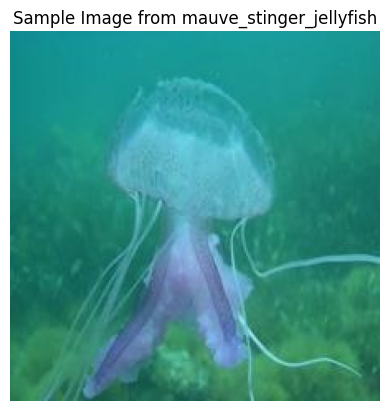

In [59]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#  path to the train folder
train_folder = "train_Test_Valid/train"

#  class directories
classes = os.listdir(train_folder)

# class folder and image
sample_class = classes[0]
sample_image_path = os.path.join(train_folder, sample_class, os.listdir(os.path.join(train_folder, sample_class))[0])

# displaying image
image = load_img(sample_image_path)  # Load the image
plt.imshow(image)
plt.title(f"Sample Image from {sample_class}")
plt.axis('off')
plt.show()

In [60]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
input_dir = "/root/.cache/kagglehub/datasets/anshtanwar/jellyfish-types/versions/16"
output_dir = "train_Test_Valid"

# Ratios for splitting
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Supported file extensions
valid_extensions = {'.jpg', '.jpeg', '.png'}

# Cleaning and recreate output directories
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
for split in ['train', 'valid', 'test']:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

# Organizing the dataset
for class_folder in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_folder)
    if os.path.isdir(class_path):
        # Collect valid image files
        images = [
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f)) and os.path.splitext(f)[1].lower() in valid_extensions
        ]

        print(f"Class: {class_folder}, Total Files: {len(images)}")

        if not images:
            print(f"Warning: No valid images found in {class_folder}. Skipping...")
            continue

        # Spliting into train, validation, and test
        train_files, test_files = train_test_split(images, test_size=(valid_ratio + test_ratio), random_state=42)
        valid_files, test_files = train_test_split(test_files, test_size=test_ratio / (valid_ratio + test_ratio), random_state=42)

        # files to respective directories
        for split, files in zip(['train', 'valid', 'test'], [train_files, valid_files, test_files]):
            split_class_dir = os.path.join(output_dir, split, class_folder)
            os.makedirs(split_class_dir, exist_ok=True)
            for file in files:
                shutil.copy(os.path.join(class_path, file), os.path.join(split_class_dir, file))
                print(f"Copied {file} to {split_class_dir}")

print("Dataset organized successfully into train, valid, and test folders!")

Class: mauve_stinger_jellyfish, Total Files: 150
Copied 25.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied aug-48-58.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied aug-10-13.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied aug-67-12.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied 58.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied aug-3-04.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied 55.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied aug-37-46.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied 16.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied aug-49-59.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied 04.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied aug-64-08.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied aug-50-62.jpg to train_Test_Valid/train/mauve_stinger_jellyfish
Copied 23.jpg to train_Test_Valid/train/mauve_stinger_jellyfish


In [61]:
import os

for split in ['train', 'valid', 'test']:
    split_path = os.path.join("train_Test_Valid", split)
    print(f"{split.capitalize()} classes:", os.listdir(split_path))
    for class_folder in os.listdir(split_path):
        class_path = os.path.join(split_path, class_folder)
        print(f"Class: {class_folder}, Files: {len(os.listdir(class_path))}")

Train classes: ['mauve_stinger_jellyfish', 'compass_jellyfish', 'Moon_jellyfish', 'lions_mane_jellyfish', 'blue_jellyfish', 'barrel_jellyfish']
Class: mauve_stinger_jellyfish, Files: 105
Class: compass_jellyfish, Files: 105
Class: Moon_jellyfish, Files: 105
Class: lions_mane_jellyfish, Files: 105
Class: blue_jellyfish, Files: 105
Class: barrel_jellyfish, Files: 105
Valid classes: ['mauve_stinger_jellyfish', 'compass_jellyfish', 'Moon_jellyfish', 'lions_mane_jellyfish', 'blue_jellyfish', 'barrel_jellyfish']
Class: mauve_stinger_jellyfish, Files: 22
Class: compass_jellyfish, Files: 22
Class: Moon_jellyfish, Files: 22
Class: lions_mane_jellyfish, Files: 22
Class: blue_jellyfish, Files: 22
Class: barrel_jellyfish, Files: 22
Test classes: ['mauve_stinger_jellyfish', 'compass_jellyfish', 'Moon_jellyfish', 'lions_mane_jellyfish', 'blue_jellyfish', 'barrel_jellyfish']
Class: mauve_stinger_jellyfish, Files: 23
Class: compass_jellyfish, Files: 23
Class: Moon_jellyfish, Files: 23
Class: lions_man

In [62]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Path to the directory
train_dir = "train_Test_Valid/train"
valid_dir = "train_Test_Valid/valid"
test_dir = "train_Test_Valid/test"

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# dataset
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=(150, 150), batch_size=32, class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', shuffle=False
)

# Model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 classes
])

Found 630 images belonging to 6 classes.
Found 132 images belonging to 6 classes.
Found 138 images belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator
)

# Evaluating on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
model.summary()

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9131 - loss: 0.2796 - val_accuracy: 0.8788 - val_loss: 0.3822
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9689 - loss: 0.1261 - val_accuracy: 0.8636 - val_loss: 0.4669
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9531 - loss: 0.1560 - val_accuracy: 0.8561 - val_loss: 0.5414
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9557 - loss: 0.1431 - val_accuracy: 0.8485 - val_loss: 0.5224
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9547 - loss: 0.1310 - val_accuracy: 0.7955 - val_loss: 0.6879
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9662 - loss: 0.1265 - val_accuracy: 0.8561 - val_loss: 0.4729
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9758 - loss: 0.0882 - val_accuracy: 0.8712 - val_loss: 0.4835
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9774 - loss: 0.0739 - val_accuracy: 0.8636 - val_loss:

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,487,380 (55.26 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,658,254 (36.84 MB)

In [65]:
#modified layer
model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(train_generator, epochs=10, validation_data=valid_generator)
test_loss_2, test_acc_2 = model_2.evaluate(test_generator)
print(f"Model 2 Test Accuracy: {test_acc_2 * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1775 - loss: 1.7824 - val_accuracy: 0.2500 - val_loss: 1.7466
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2641 - loss: 1.7472 - val_accuracy: 0.2955 - val_loss: 1.7033
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3238 - loss: 1.6799 - val_accuracy: 0.2197 - val_loss: 1.6534
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2905 - loss: 1.6713 - val_accuracy: 0.4015 - val_loss: 1.5887
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3615 - loss: 1.5873 - val_accuracy: 0.4242 - val_loss: 1.5032
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3875 - loss: 1.5571 - val_accuracy: 0.4318 - val_loss: 1.4586
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4112 - loss: 1.4596 - val_accuracy: 0.3939 - val_loss: 1.4719
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4314 - loss: 1.4131 - val_accuracy: 0.4545 - val_loss:

In [66]:
# Adding Dropout and AveragePooling
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])
model_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(train_generator, epochs=10, validation_data=valid_generator)
test_loss_3, test_acc_3 = model_3.evaluate(test_generator)
print(f"Model 3 Test Accuracy: {test_acc_3 * 100:.2f}%")

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2008 - loss: 2.5407 - val_accuracy: 0.3182 - val_loss: 1.6180
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3021 - loss: 1.7014 - val_accuracy: 0.4545 - val_loss: 1.4943
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3721 - loss: 1.5598 - val_accuracy: 0.4773 - val_loss: 1.3140
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4087 - loss: 1.4210 - val_accuracy: 0.4773 - val_loss: 1.2755
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4857 - loss: 1.3719 - val_accuracy: 0.5303 - val_loss: 1.2259
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4741 - loss: 1.3382 - val_accuracy: 0.5606 - val_loss: 1.1020
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5115 - loss: 1.2323 - val_accuracy: 0.5000 - val_loss: 1.1977
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5221 - loss: 1.2273 - val_accuracy: 0.5833 - val_loss:

In [68]:
# Results comparison
print("\nAccuracy Comparison:")
print(f"Model 1: {test_accuracy  * 100:.2f}%")
print(f"Model 2: {test_acc_2 * 100:.2f}%")
print(f"Model 3: {test_acc_3 * 100:.2f}%")


Accuracy Comparison:
Model 1: 83.33%
Model 2: 34.78%
Model 3: 60.14%


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on the test set
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step
Classification Report:
                         precision    recall  f1-score   support

         Moon_jellyfish       0.92      0.96      0.94        23
       barrel_jellyfish       0.94      0.70      0.80        23
         blue_jellyfish       0.79      1.00      0.88        23
      compass_jellyfish       0.83      0.83      0.83        23
   lions_mane_jellyfish       0.80      0.87      0.83        23
mauve_stinger_jellyfish       0.75      0.65      0.70        23

               accuracy                           0.83       138
              macro avg       0.84      0.83      0.83       138
           weighted avg       0.84      0.83      0.83       138

Confusion Matrix:
[[22  0  1  0  0  0]
 [ 1 16  2  2  0  2]
 [ 0  0 23  0  0  0]
 [ 0  0  0 19  3  1]
 [ 0  0  0  1 20  2]
 [ 1  1  3  1  2 15]]


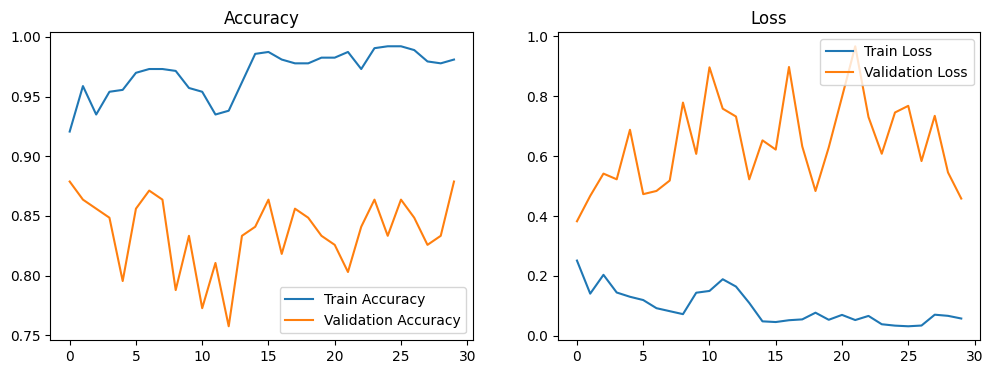

In [70]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [23]:
model.save('jellyfish_classifier_model.keras')